In [1]:
%matplotlib inline

In [2]:
import json
import glob
from urllib.parse import urlparse
from bs4 import BeautifulSoup
import tqdm
import pandas

Modify the directory where the json files are globbed to run this locally (use aws sync to grab the content directory)

In [3]:
docs=[]
for filename in glob.glob('../loaded_data/dump/content/*/*/*.json'):
    with open(filename) as infile:
        docs.append(json.load(infile))
len(docs)

2134

In [4]:
test_doc = docs[111]
extract = test_doc['extract']
content = extract['content']
provider_url = extract['provider_url']

In [5]:
f=urlparse(provider_url)
f.scheme+"://"+f.netloc+"/"+f.path

'http://www.jpl.nasa.gov/'

In [6]:
provider_url

'http://www.jpl.nasa.gov'

In [7]:
soup = BeautifulSoup(content, 'html5lib')

In [8]:
[elem.get('href') for elem in soup.find_all('a')]


['http://www.nasa.gov/mission_pages/WISE/multimedia/gallery/pia13455.html',
 'http://www.nasa.gov/spitzer',
 'http://spitzer.caltech.edu',
 'http://www.nasa.gov/wise']

In [9]:
def get_urls(content):
    soup=BeautifulSoup(content, 'html5lib')
    urls = [link.get('href') for link in soup.find_all('a')]
    return urls

In [10]:
domain_counts={}
provider_domain_counts={}
for doc in tqdm.tqdm(docs):
    extract=doc['extract']
    content=extract['content']
    provider_url=extract['provider_url']
    provider_parts = urlparse(provider_url)
    provider_domain = provider_parts.netloc
    provider_domain_counts[provider_domain] = provider_domain_counts.get(provider_domain, 0) + 1
    if content is not None and len(content) > 0:
        urls = get_urls(content)
        for url in urls:
            parts = urlparse(url)
            domain = parts.netloc
            if domain != provider_domain:
                domain_counts[domain] = domain_counts.get(domain, 0) + 1
                

100%|██████████| 2134/2134 [00:12<00:00, 167.14it/s]


In [11]:
pandas.Series(domain_counts).sort_values()

www.breastcancer.org            1
abc13.com                       1
www.bilanz.ch                   1
biomimicry.org                  1
engineering.dartmouth.edu       1
wonkette.com                    1
changingminds.org               1
www.kpcb.com                    1
redditmetrics.com               1
www.utas.edu.au                 1
flic.kr                         1
grantland.com                   1
patft.uspto.gov                 1
www.stlouisfed.org              1
pwg.gsfc.nasa.gov               1
w3c.github.io                   1
ds9.botanik.uni-bonn.de         1
www.pubservice.com              1
lakdiva.org                     1
www.aauw.org                    1
www.ebikekit.com                1
medicine.temple.edu             1
communitytable.com              1
video.cnbc.com                  1
www.simonsfoundation.org        1
highway1.io                     1
www.rsb.org.uk                  1
www.missionjuno.swri.edu        1
www.turbulenceforecast.com      1
www.cs.toronto

In [12]:
pandas.Series(provider_domain_counts).sort_values()

zeenews.india.com                          1
www.kpbs.org                               1
www.ksdk.com                               1
whqr.org                                   1
www.ksla.com                               1
www.livescience.com                        1
veterinarynews.dvm360.com                  1
www.massdevice.com                         1
www.mirror.co.uk                           1
www.montereyherald.com                     1
www.moondaily.com                          1
www.nanodaily.com                          1
ssi.org                                    1
www.nasaspaceflight.com                    1
spaceflightnow.com                         1
robohub.org                                1
www.nbcnews.com                            1
www.news-medical.net                       1
www.ft.com                                 1
ophthalmologytimes.modernmedicine.com      1
norcal.news                                1
www.news.ucsb.edu                          1
www.kmov.c

In [13]:
domain_counts['twitter.com']

272

In [14]:
stats = pandas.DataFrame.from_dict(provider_domain_counts, orient="index")

In [15]:
stats.columns=(['provider_urls'])


In [16]:
stats['content_appearances'] = stats.index.map(lambda x: domain_counts.get(x, 0))

In [17]:
stats.sort_values('content_appearances', ascending=False, inplace=True)

In [18]:
stats['ratio'] = stats['content_appearances'] / stats['provider_urls']

In [19]:
stats.sort_values('ratio', ascending=False, inplace=True)

In [20]:
stats

,provider_urls,content_appearances,ratio
www.livescience.com,1,75,75.000000
www.eurekalert.org,1,42,42.000000
www.nasa.gov,10,236,23.600000
www.nature.com,2,33,16.500000
www.npr.org,1,7,7.000000
www.youtube.com,13,82,6.307692
www.telegraph.co.uk,1,5,5.000000
www.independent.co.uk,1,5,5.000000
fortune.com,1,4,4.000000
spaceflightnow.com,1,3,3.000000


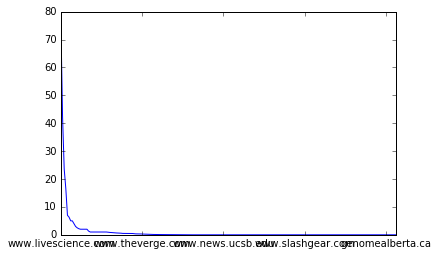

In [21]:
stats['ratio'].plot()


In [22]:
outside_domains={key:value for (key,value) in domain_counts.items() if key not in provider_domain_counts}

In [23]:
outside_domains=pandas.Series(outside_domains)


In [24]:
outside_domains.sort_values(ascending=False, inplace=True)


In [25]:
outside_domains

twitter.com                              272
en.wikipedia.org                         137
www.facebook.com                         135
                                         100
phys.org                                  96
medicalxpress.com                         93
cdn.phys.org                              71
www.pinterest.com                         64
news.discovery.com                        55
dx.doi.org                                54
dawn.jpl.nasa.gov                         54
theconversation.com                       53
arxiv.org                                 46
t.co                                      44
plus.google.com                           41
eepurl.com                                33
dawnblog.jpl.nasa.gov                     31
www.theguardian.com                       31
www.ncbi.nlm.nih.gov                      28
www.collectspace.com                      28
doi.org                                   28
www.amazon.com                            27
img.medica